# Feature Scaling

In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np
import numpy.typing as npt

get_ipython().run_line_magic('matplotlib', 'notebook')

## Example Problem

## Traning data

In [2]:
data = np.loadtxt("./data/houses.txt", delimiter=',')
X_train = data[:,:4]
y_train = data[:,4]

X_features = ['size(sqft)','bedrooms','floors','age']

## Plot Features vs. Price

<IPython.core.display.Javascript object>


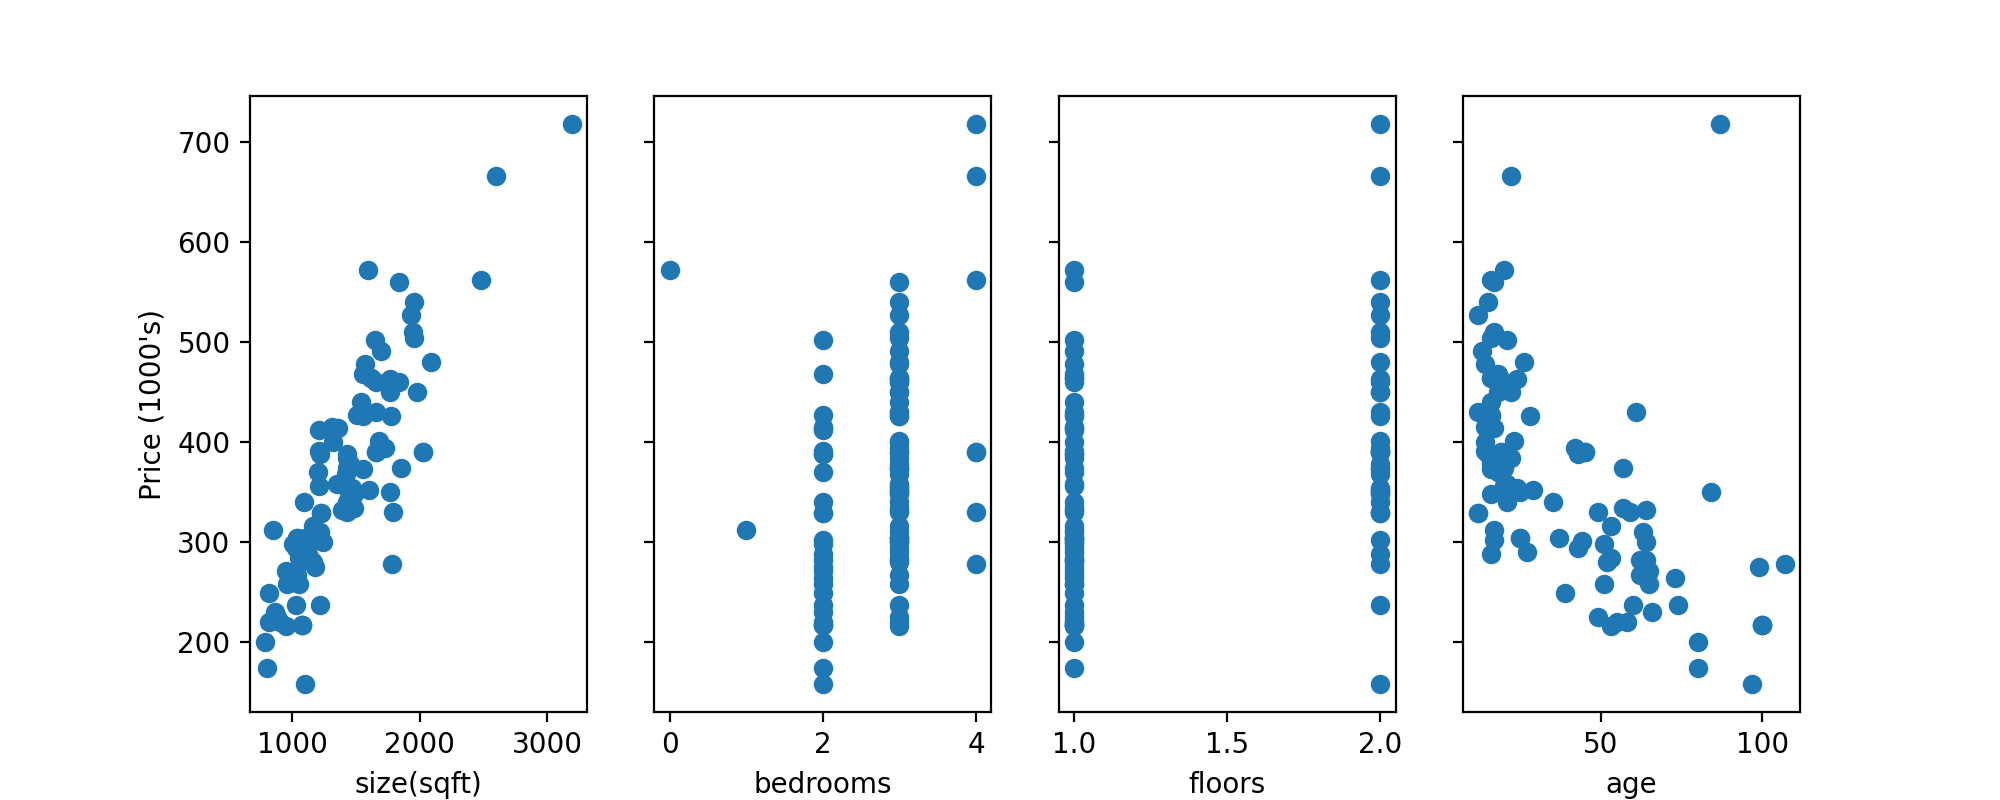

In [3]:
fig,ax=plt.subplots(1, 4, figsize=(10, 4), sharey=True)

for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train)
    ax[i].set_xlabel(X_features[i])

ax[0].set_ylabel("Price (1000's)")

plt.show()

## Mean Normalization

$$ \mathbf{x}_j = \frac{\mathbf{x}_j - \mu_j}{x_{j,max} - x_{j,min}} \tag{1} \ ,$$

where $\mu_n$ is the mean value of the feature vector $\mathbf{x}_j$ over all training examples.

In [4]:
X_train_mean_norm = np.empty_like(X_train)

for i in range(X_train.shape[1]):
    mu = np.mean(X_train[:,i])
    xmax = np.max(X_train[:,i])
    xmin = np.min(X_train[:,i])
    
    X_train_mean_norm[:,i] = (X_train[:,i] - mu)/(xmax - xmin)

<IPython.core.display.Javascript object>


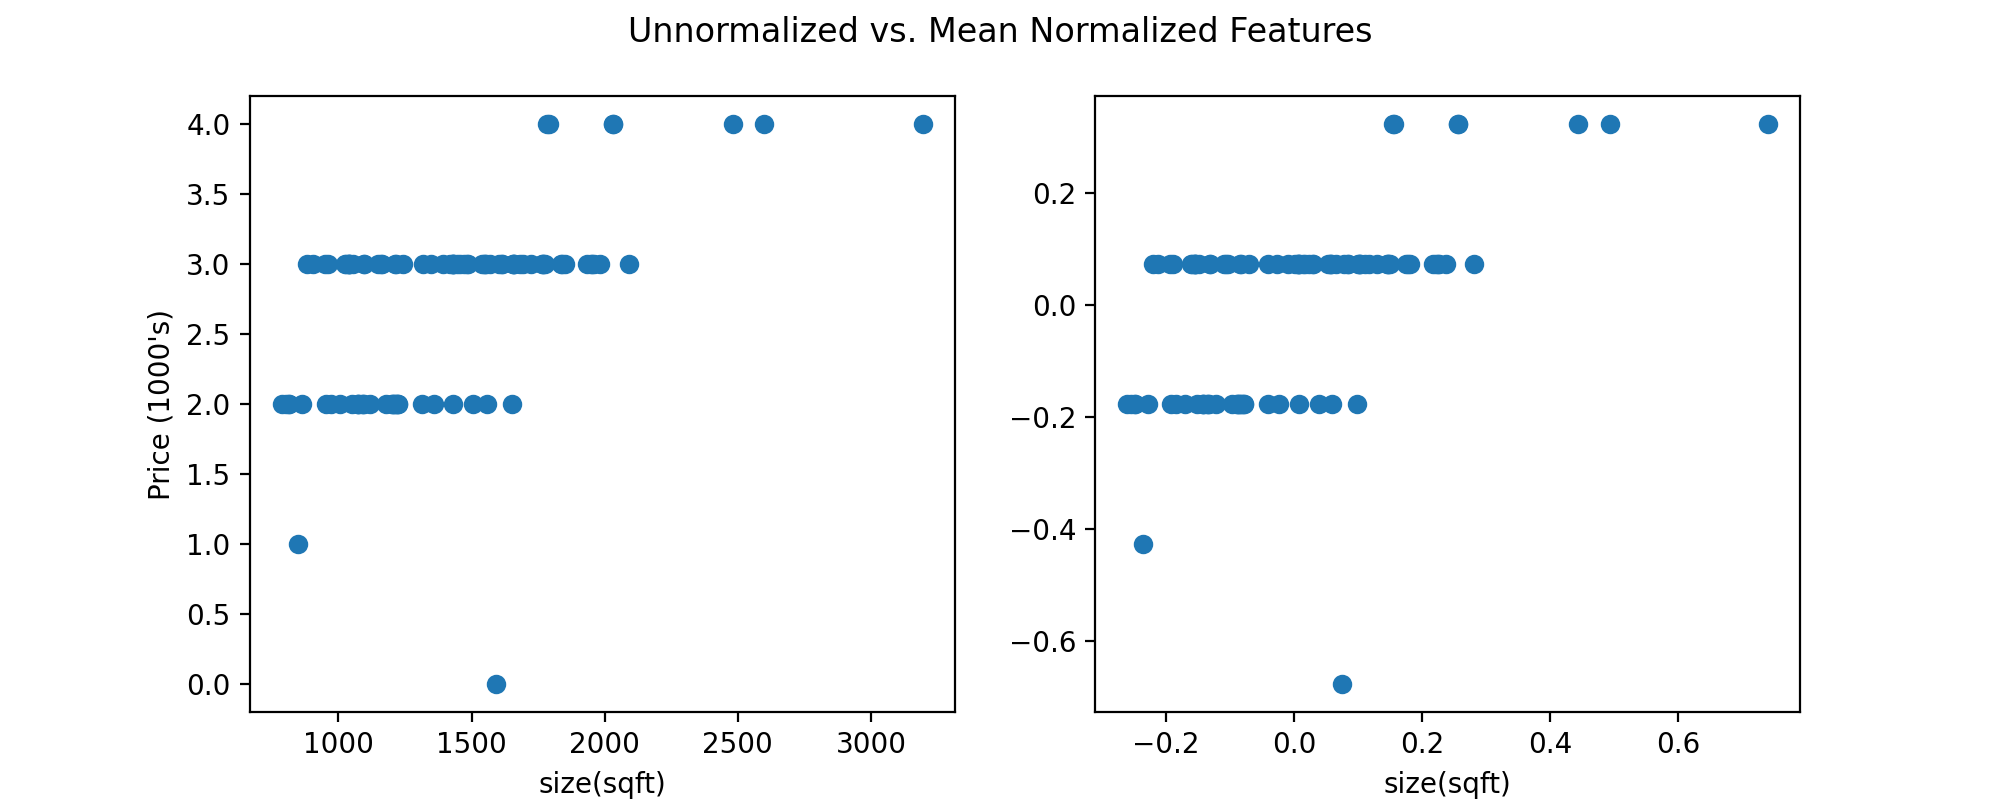

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), sharey=False)

fig.suptitle('Unnormalized vs. Mean Normalized Features')
ax1.scatter(X_train[:,0],X_train[:,1])
ax2.scatter(X_train_mean_norm[:,0],X_train_mean_norm[:,1])

ax1.set_xlabel(X_features[0])
ax1.set_ylabel("Price (1000's)")

ax2.set_xlabel(X_features[0])

plt.show()

## Z-Score Normalization

$$ \mathbf{x}_j = \frac{\mathbf{x}_j - \mu_j}{\sigma_n} \tag{2} \ ,$$

where $\mu_n$ is the mean value and $\sigma_n$ is the standard deviation of the feature vector $\mathbf{x}_j$ over all training examples.

## Define Cost-Function

In [ ]:
def compute_cost(X,y,w,b):

    m = X.shape[0] # number of training examples
    
    sum_cost = 0
    
    for i in range(m):
        fwb = np.dot(w,X[i])+ b
        sum_i = (fwb - y[i])**2
        sum_cost = sum_cost + sum_i

    cost_value = sum_cost/(2*m)
    
    return cost_value

## Define Function for Gradient Caluclation

In [ ]:
def compute_gradient(X,y,w,b):
    
    m = X.shape[0] # number of training examples
    n = X.shape[1] # number of features
    
    sum_dw = np.zeros(n)
    sum_db = 0
    
    for i in range(m):
        cost = np.dot(w,X[i])+ b - y[i]
        sum_db += cost
        for j in range(n):
            sum_dw[j] = sum_dw[j] + cost * X[i,j]
        
    dj_dw = sum_dw/m    
    dj_db = sum_db/m
    
    return dj_db, dj_dw

## Define Gradient Descent Function for Optimizating the Parameter

In [ ]:
def gradient_descent(X,y,w_init,b_init,alpha,cost_function,gradient_function,num_iter):
    
    w = w_init
    b = b_init
    J_history = []
    w_history = []
    b_history = []
    
    for i in range(num_iter):
        # compute cost value
        J_history.append(compute_cost(X,y,w,b))
        
        # compute gradient
        dj_db, dj_dw = compute_gradient(X,y,w,b)
        
        # update parameter w and b
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        w_history.append(w)
        b_history.append(b)
        
    return w, b, J_history, w_history, b_history

## Run Gradient Descent Algorithm

In [ ]:
X = X_train_norm
y = y_train

b_init = 0.
w_init = np.array([ 1, 1, 1, 1])

cost_function = compute_cost
gradient_function = compute_gradient

alpha = 1e-6
num_iter = 50000

w,b,J_history,w_history, b_history = gradient_descent(X,y,w_init,b_init,alpha,cost_function,gradient_function,num_iter)

## Optimized Parameter Value Pair

In [ ]:
print(f'Optimized values for w : {w}')
print(f'Optimized value for b : {b:0.3f}')

## Comparison Predicted vs. Target Values

In [ ]:
for i in range(X_train.shape[0]):
    y_pred = np.dot(w,X_train[i])+ b
    print(f'Predicted value: {y_pred:0.1f}, target value: {y_train[i]}')

## Visualize Cost-Function

In [ ]:
plt.figure(figsize=(6,6))
ax = plt.axes()

ax.plot(np.arange(len(J_history[5000:])),J_history[5000:])

ax.set_xlabel('Number of Iterations')
ax.set_ylabel('Cost value')
ax.set_title("Cost vs. iteration (tail)")

plt.show()